# SANTANDER CASE - Data Scientist 

## b) Net Promoter Score (NPS)

In this task we need to give a rate from 1 to 5 for each customer of the test base respecting the 'TARGET' feature, that is, their level of satisfaction. The following points will guide de score system:
- 1 being the most dissatisfied and 5 the most satisfied; 
- The retention program should only be applied to customers we NPS. 

### In order to solve this problem, we are going to do the following steps:
- 1 Loading Data and Packeges;
- 2 The Classification Model;
    - 2.1 Method;
    - 2.2 Dataset Split (train - test)
    - 2.3 Rebuilding the selected dataset;
    - 2.4 Retraining the model;
- 3 Strategie & Method;
    - 3.1 Threshold selection;
    - 3.2 Function to label the NPS; 
- 4 Results Analysis;
    - 4.1 Results on X_test (known data)
    - 4.2 Results on df_test (unknown data)
- 5 Next steps;
- 6 References;

### 1 Loadgin Data and Packeges

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [2]:
# Loading the Train and Test datasets
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

### 2 The Classification Model

#### 2.1 Method
Knowing the satisfaction score, allow us to take the results that maximize the profits as well as to understand the behaviour and satisfaction of each customer.

The classification model, that we build in Part A, has also the option to output the probability of the customer be unsatisfied.  
  
By using this type of output, we can then create 5 intervals, one for each level of satisfaction. The customer will receive a satisfaction label accordingly the interval which the outputted probability fit.

So let's first rebuild the model of Part A.

#### 2.2 Dataset Split (train - test)
As said in Part A, section 3, the train_test_split method does the segmentation at random, even with an extremely unbalanced dataset, the split should occur so that both training and testing have the same proportion of unsatisfied customers.  
**However, as it is difficult to guarantee randomness in fact, we can make a stratified split based on the TARGET variable and thus ensure that the proportion is exact in both datasets.**

In [3]:
from sklearn.model_selection import train_test_split

# Spliting the dataset on a proportion of 80% for train and 20% for test.
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('TARGET', axis = 1), df_train.TARGET, 
                                                    train_size = 0.8, stratify = df_train.TARGET,
                                                    random_state = 42)

#Checando o resultado do splot
X_train.shape, y_train.shape[0], X_test.shape, y_test.shape[0]

((60816, 370), 60816, (15204, 370), 15204)

#### 2.3 Rebuilding the selected dataset
Here we need to: 
- Remove constant / semi-constat features;
- Remove duplicate features;
- Selecting only the best 96 features that we found in Part-A.

In [4]:
# Making copys of X_train and X_test to work with in this section
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

Remove constant and semi-constant features.

In [5]:
# Investigating if there are constant or semi-constat feature in X_train
from sklearn.feature_selection import VarianceThreshold

# Removing all features that have variance under 0.01
selector = VarianceThreshold(threshold = 0.01)
selector.fit(X_train_clean)
mask_clean = selector.get_support()
X_train_clean = X_train_clean[X_train_clean.columns[mask_clean]]

Remove duplicate features.

In [6]:
# Checking if there is any duplicated column
remove = []
cols = X_train_clean.columns
for i in range(len(cols)-1):
    column = X_train_clean[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(column, X_train_clean[cols[j]].values):
            remove.append(cols[j])


# If yes, than they will be dropped here
X_train_clean.drop(remove, axis = 1, inplace=True)

Selecting the 96 best features.

In [7]:
# Selection the 96 best features aconrdingly to f_classif
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector_fc = SelectKBest(score_func = f_classif, k = 96)
selector_fc.fit(X_train_clean, y_train)
mask_selected = selector_fc.get_support()

# Saving the selected columns in a list
selected_col = X_train_clean.columns[mask_selected]

In [62]:
# Creating datasets where only with the selected 96 features are included
X_train_selected = X_train[selected_col]
X_test_selected = X_test[selected_col]

Now let's check the result.

In [9]:
X_train_selected.head()

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var12_hace2,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
56035,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3.0,2.52,0.00,0.0,0.00,0.0,0.0,0.0,0.0,117310.979016
15449,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,30.0,4990.50,25741.95,42034.5,33888.24,0.0,0.0,0.0,0.0,68480.010000
68443,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3.0,2.49,0.00,0.0,0.00,0.0,0.0,0.0,0.0,57517.740000
50258,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3.0,2.64,0.00,0.0,0.00,0.0,0.0,0.0,0.0,60060.930000
4858,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3.0,2.85,0.00,0.0,0.00,0.0,0.0,0.0,0.0,84028.740000


In [10]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60816 entries, 56035 to 22022
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   var15                          60816 non-null  int64  
 1   imp_op_var40_efect_ult1        60816 non-null  float64
 2   imp_op_var40_efect_ult3        60816 non-null  float64
 3   imp_op_var41_efect_ult1        60816 non-null  float64
 4   imp_op_var41_efect_ult3        60816 non-null  float64
 5   imp_op_var41_ult1              60816 non-null  float64
 6   imp_op_var39_efect_ult1        60816 non-null  float64
 7   imp_op_var39_efect_ult3        60816 non-null  float64
 8   imp_op_var39_ult1              60816 non-null  float64
 9   ind_var5_0                     60816 non-null  int64  
 10  ind_var5                       60816 non-null  int64  
 11  ind_var8_0                     60816 non-null  int64  
 12  ind_var8                       60816 non-n

Seams that the process to rebuild the selected dataset was successfully done.  

Now we can move forward.

#### 2.4 Retraining the model
In this step we just need to use the optimized hyperparameter in order to train the XGBClassifier.

In [11]:
# Importing libraris
from sklearn.metrics import roc_auc_score as auc
import xgboost as xgb

Let's recap the best hyperparameters:
- learning rate: 0.007961566078062952;
- n_estimators: 1397;
- max_depth: 4;
- min_child_weight: 5.711008778424264;
- gamma: 0.2816441089227697;
- subsample: 0.692708251269958;
- colsample_bytree: 0.5079831261101071.

In [12]:
# Generating the model with the optimized hyperparameters
clf_optimized = xgb.XGBClassifier(learning_rate = 0.007961566078062952, n_estimators = 1397, 
                                  max_depth = 4, min_child_weight = 5.711008778424264, 
                                  gamma = 0.2816441089227697, subsample = 0.692708251269958, 
                                  colsample_bytree = 0.5079831261101071, seed = 42)

In [13]:
# Fitting the model to the X_train_selected dataset
clf_optimized.fit(X_train_selected, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5079831261101071,
              gamma=0.2816441089227697, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.007961566078062952,
              max_delta_step=0, max_depth=4, min_child_weight=5.711008778424264,
              missing=nan, monotone_constraints='()', n_estimators=1397,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.692708251269958, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
# Evaluating the performance of the model in the test data (which have not been used so far).
y_predicted = clf_optimized.predict_proba(X_test_selected)[:,1]
auc(y_test, y_predicted)

0.847702790451952

**As in Part A the model scored an AUC of 0.8477.**

Now let's check how is the output of the classifier model in probability format.

In [15]:
# checking the output in probability format
clf_optimized.predict_proba(X_test_selected)[:,1]

array([0.01826211, 0.03021165, 0.00381383, ..., 0.03343312, 0.02100796,
       0.02775403], dtype=float32)

As we can see, the output is an array each probability is a number between 0 and 1.  

Now that we have the model and its output in the way we need to creat the NPS system, let's move forward.

### 3 Strategie & Method

#### 3.1 Threshold selection
As mention above, now that we have the output in probability format, the question is how we will define the 5 intervals.  

Let us first take a look at the distribution of the probability of the test split!

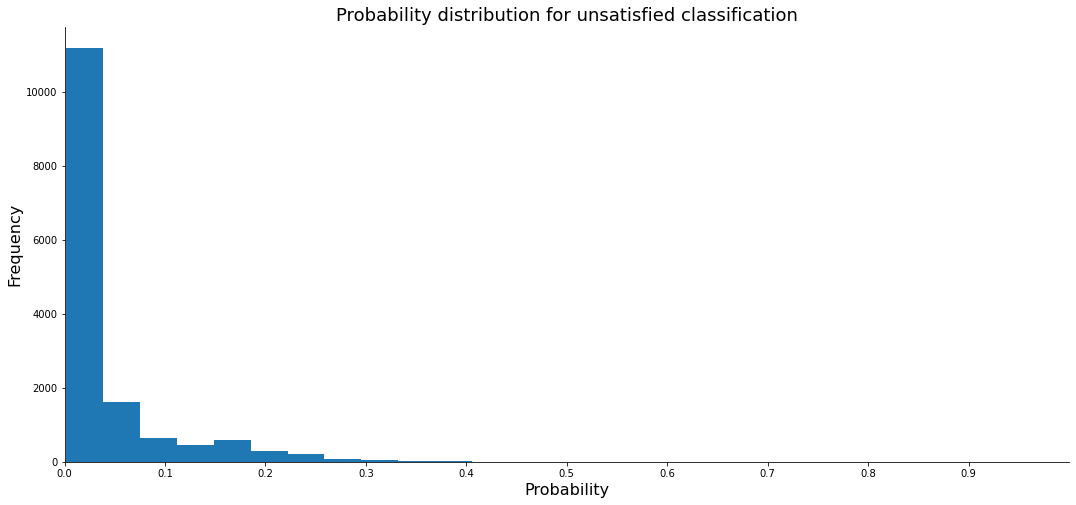

In [28]:
fig, ax = plt.subplots(figsize = (18, 8))
ax.hist(clf_optimized.predict_proba(X_test_selected)[:,1], bins = 20);
ax.set_xlim(0, 1);
plt.xticks(np.arange(0, 1, 0.1))
plt.title('Probability distribution for unsatisfied classification', fontsize=18);
plt.ylabel('Frequency', fontsize=16);
plt.xlabel('Probability', fontsize=16);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

As we can see above, the probabilities are in most part less than 0,1. This behaviour meets our expectations because just about 4,11% of the customers are unsatisfied.

We can now choose the threshold, where:
- If probability output < threshold ---> SATISFIED CUSTOMER
- If probability output > threshold ---> UNSATISFIED CUSTOMER

So let's plot the ROC curve in order to choose the best threshold.

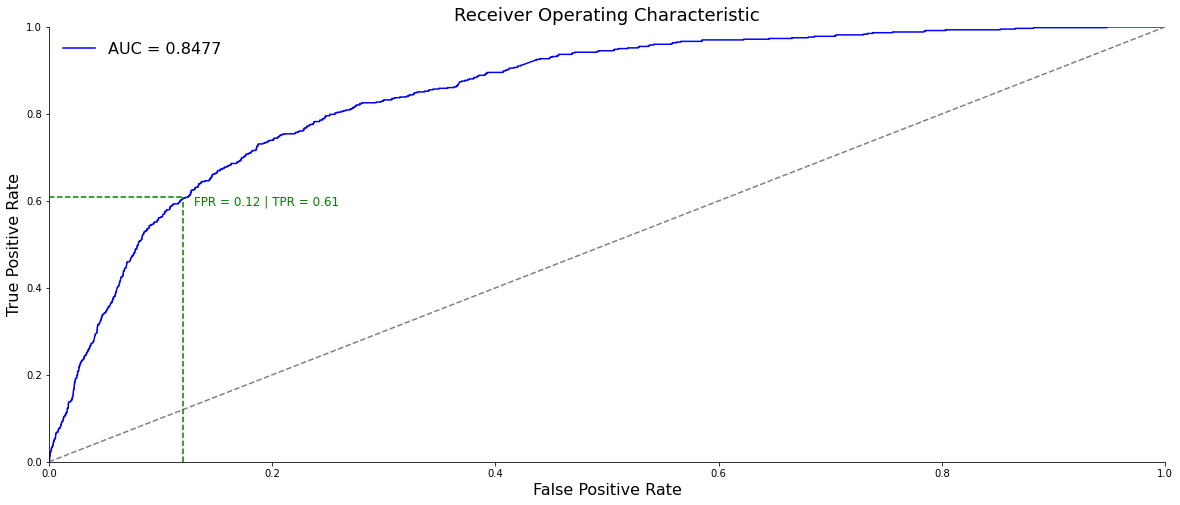

In [50]:
# Code base on this post: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics

# Calculate FPR and TPR for all thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 8))
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc = 'upper left', fontsize = 16, frameon = False)
plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xlabel('False Positive Rate', fontsize = 16)

ax.plot([0.12, 0.12], [0, 0.61], color='green', linestyle='dashed', label='FPR = 0.12')
ax.plot([0, 0.12], [0.61, 0.61], color='green', linestyle='dashed', label='FPR = 0.12')
plt.text(0.13, 0.59, 'FPR = 0.12 | TPR = 0.61', fontsize = 12, color = 'green')

plt.show()

As known, the best threshold is giving by the point that is closer to the upper left corner of the ROC curve graph.  

Marked in green on the graph, is the point that generates the best threshold for the model. So let's work with FPR of 0.12 and get its threshold.

In [51]:
# Finding the threshold value for FPR = 0,12.
threshold[np.where(np.around(fpr, decimals = 2) == 0.12)[0][0]]

0.09166643

**Now we can define that every customer, that if the output probability is equal or greater than 0.09166643 is unsatisfied and will receive label 1 in our NPS system.**

If the outputted probability is less than 0.09166643, then the customer is satisfied.

We want now label satisfied customers. They can receive label 2, 3, 4 and 5, where 5 means most satisfied. To label the customers we will split the interval from 0 to 0.09166643 in 4 subintervals.

In [57]:
# Defining the subintervals
increment = threshold[np.where(np.around(fpr, decimals = 2) == 0.12)[0][0]] / 4
label_5_lower = 1 * increment
label_4_lower = 2 * increment
label_3_lower = 3 * increment
label_2_lower = 4 * increment

In [58]:
# Printing the intervals
print('0 to {} - label 5'.format(label_5_lower))
print('{} to {} - label 4'.format(label_5_lower, label_4_lower))
print('{} to {} - label 3'.format(label_4_lower, label_3_lower))
print('{} to {} - label 2'.format(label_3_lower, label_2_lower))

0 to 0.022916607558727264 - label 5
0.022916607558727264 to 0.04583321511745453 - label 4
0.04583321511745453 to 0.0687498226761818 - label 3
0.0687498226761818 to 0.09166643023490906 - label 2


Now that we defined the subintervals for labelling the satisfied customers and the interval for labelling the unsatisfied customer, we can develop a function that will label just one customer or even the entire dataset.

#### 3.2 Function to label the NPS

In [100]:
def NPS(df, predicted_probabilities):
    """Label the customers as their satisfaction level by fitting to an invervalthe outputted probability 
    of the customer be unsatisfied (Target = 1).
    
    Parameters:
    df é a instancia unitária que deve receber a label ou um dataframe inteiro.
    predict_probabilities é o elemento unico ou a array de probabilidades gerado pelo modelo.
    
    df can be only one instance or an entire dataframe to be labeled.
    predicted_probabilities is an element or an entire array with all the probabilites geterated by the model
    for this instance or dataset.
    
    Return:
    return the inputed instance or dataframe with the label column appended, which contains the NPS for
    each customer.
    """
    
    label_list = []
    for i in range(0, len(predicted_probabilities)):
        
        if predicted_probabilities[i] >= label_2_lower:
            label_list.append(1)
        elif label_3_lower <= predicted_probabilities[i] < label_2_lower:
            label_list.append(2)
        elif note_4_lower <= predicted_probabilities[i] < label_3_lower:
            label_list.append(3)
        elif label_5_lower <= predicted_probabilities[i] < label_4_lower:
            label_list.append(4)
        elif 0 <= predicted_probabilities[i] < label_5_lower:
            label_list.append(5)
            
    
    df['NPS'] = label_list
    return df

### 4 Results Analysis;
With the function of the customer labelling task ready, we can test it in the X_test_selected dataset created in section 2.

#### 4.1 Results on X_test (known  Target)
It is important to start the analysis in this part because this dataset has the Target features. That means we are testing, first, on data that we know and can, therefore, give us the opportunity to evaluate and understand the NPS system developed.

In [87]:
# Re-adding the target feature to the test dataset
X_test['target'] = y_test

In [117]:
# Predicting the probabilities for the X_test_selected dataframe
y_predicted_prob = clf_optimized.predict_proba(X_test_selected)[:,1]

We now have the test dataset with the target column re-added, in order to control how many unsatisfied customers receive NPS 1 (a high rate is desired),  as well as an array with the probabilities of all customer from the test dataset to input the NPS function. We can finally label all the customers.

In [118]:
NPS(X_test, y_predicted_prob)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,target,NPS
63089,125987,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,5
27056,54150,2,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72380.010000,0,4
5923,11883,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121334.280000,0,5
4865,9733,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114830.010000,0,5
6344,12745,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82863.900000,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,145076,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55667.400000,0,5
4470,8976,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,1
61915,123578,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72733.590000,0,4
60032,119823,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115950.060000,0,5


Finally, it is possible to compare how the customer's NPS labelling performance was since the target values are known. So the more customers receive  NPS of 1, for data where target = 1, the better the model's performance.

In [119]:
# Checking the NPS distribution for unsatisfied customers.
X_test[X_test['target'] == 1].NPS.value_counts()

1    357
4     79
5     75
3     50
2     41
Name: NPS, dtype: int64

In [120]:
# Number of unsatisfied customers
X_test.target.sum()

602

In [121]:
# Proportion of unsatisfied customer that were labeled with NPS 1.
(357 / 602) * 100

59.30232558139535

It can be seen that of a total of 602 unsatisfied customers, 357 received NPS equal to 1. This means that approximately 59.3% of dissatisfied customers received NPS 1.  

Although not all unsatisfied customers receive  NPS of 1, 59% is already showing an acceptable result.

In [122]:
# Checking the amount of each label in the dataset
X_test.NPS.value_counts().sort_index()

1    2047
2     490
3     883
4    2514
5    9270
Name: NPS, dtype: int64

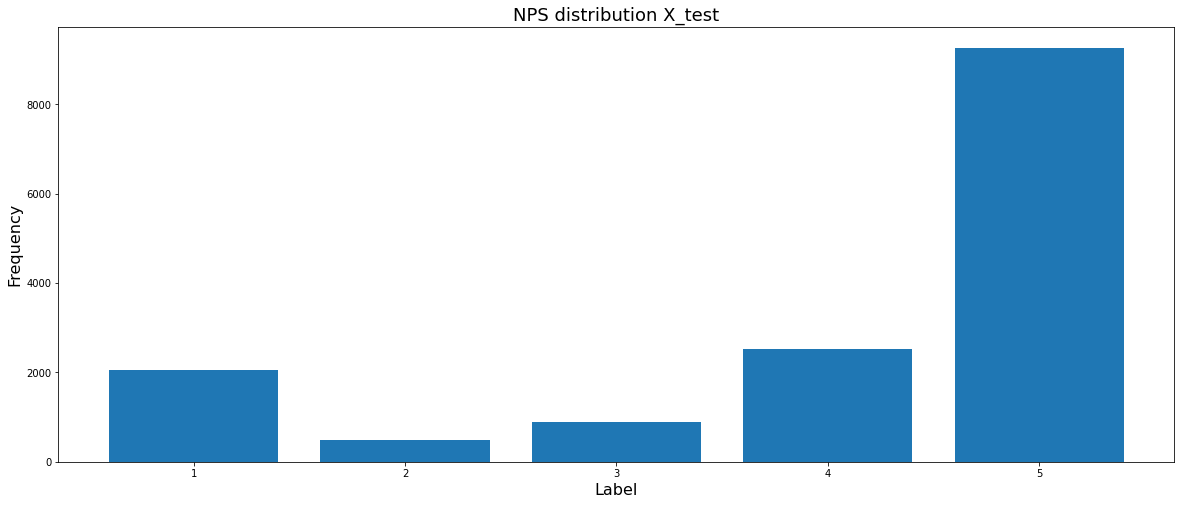

In [123]:
# Plotting the distribution of NPS
index = X_test.NPS.value_counts().sort_index().index.tolist()
values = X_test.NPS.value_counts().sort_index().values.tolist()


fig, ax = plt.subplots(figsize = (20, 8))
plt.bar(index, values);
plt.title('NPS distribution X_test', fontsize = 18);
plt.ylabel('Frequency', fontsize = 16);
plt.xlabel('Label', fontsize = 16);

In [124]:
# Calculating the proportion of label 1 for satisfied and unsatisfied customers
print('{} %'.format((X_test.NPS.value_counts().sort_index().values[0] / X_test.shape[0]) * 100))

13.463562220468297 %


Therefore, it is clear that the value of notes 1 assumes a relevant amount of **approximately 13.46%** in the distribution and works well as a condition for the dissatisfied customer retention program to be applied.

#### 4.2 Results on df_test (unknown data)
Finally, we can apply the NPS function to df_test and analyze it in a similar way as above.

In [125]:
# Predicting the probabilities for the df_predicted dataframe
y_predicted_prob = clf_optimized.predict_proba(df_test[selected_col])[:,1]

In [126]:
NPS(df_test, y_predicted_prob)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,NPS
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000,3
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000,3
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000,5
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000,5
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000,4
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000,5
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000,5
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,3


Since for this dataset, there is no target feature, we aren't able to analyse how many unsatisfied customers were labelled with NPS 1.

**Therefore, we can analyse the distribution of labels and how it looks like in regarding the NPS distribution above. 
We can as well analyse the proportion of label 1 for the whole dataset.**

In [127]:
# Checking the amount of each label in the dataset
df_test.NPS.value_counts().sort_index()

1     9723
2     2335
3     4515
4    12617
5    46628
Name: NPS, dtype: int64

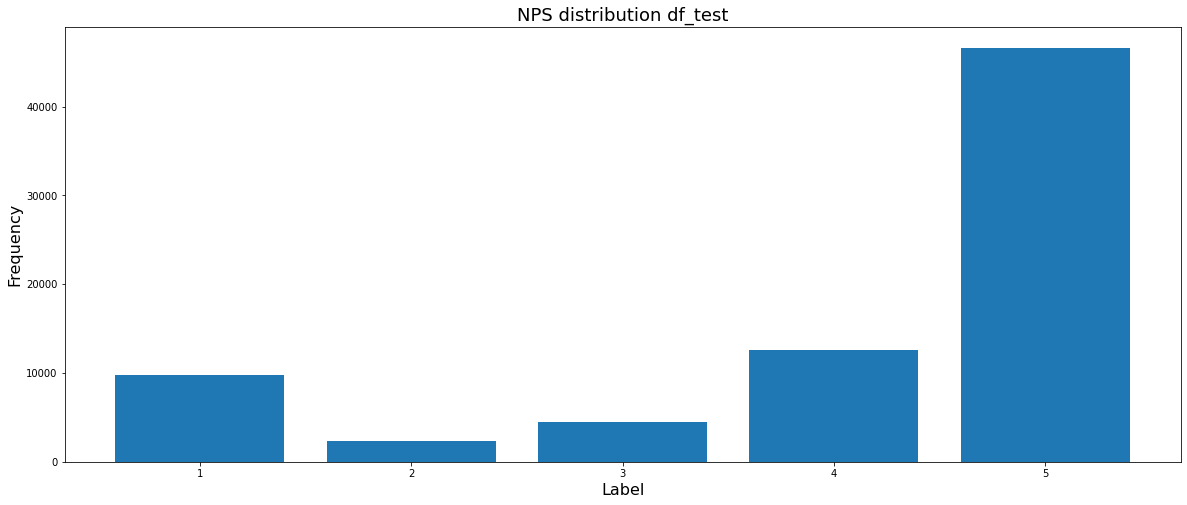

In [128]:
# Plotting the distribution of NPS for df_test
index = df_test.NPS.value_counts().sort_index().index.tolist()
values = df_test.NPS.value_counts().sort_index().values.tolist()


fig, ax = plt.subplots(figsize = (20, 8))
plt.bar(index, values);
plt.title('NPS distribution df_test', fontsize = 18);
plt.ylabel('Frequency', fontsize = 16);
plt.xlabel('Label', fontsize = 16);

In [129]:
# Calculating the proportion of label 1 for satisfied and unsatisfied customers
print('{} %'.format((df_test.NPS.value_counts().sort_index().values[0] / df_test.shape[0]) * 100))

12.824131472737344 %


**Analyzing the distribution of the df_test dataset, it is clear that its behaviour is very similar to the X_test presented in the section above.**   

**This finding is corroborated by the proportion of grades 1 being approximately 12.82%, something close to the 13.46% observed in the X_test dataframe.**

Thus, it can be concluded that the NPS system has a satisfactory performance for known data (X_test) and generalized well for unknown data (df_test) and can be used as a method to control which customers should be targeted by the retention program, as well as to better understand the level of satisfaction of each customer.

### 5 Next steps

For further iterations on this project in order to improve the analysis and the results, I would suggest 3 main points:

- As Caio Martins (https://github.com/CaioMar/) did and suggested me, a nice improvement would be to create a function that calculates the total profit. It is possible once we have values for TP and FP. So we could precise the amount of money we will spare by using this NPS system as a double-check method for applying for the retention program.
- Further improve the NPS system by searching modern methods for NPS.

### 6 References
[1] Banerjee. Prashant, Comprehensive Guide on Feature Selection., https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection  
[2] D. Beniaguev., Advanced Feature Exploration. https://www.kaggle.com/selfishgene/advanced-feature-exploration  
[3] M. Filho., A forma mais simples de selecionar as melhores variáveis usando Scikit-learn. https://www.youtube.com/watch?v=Bcn5e7LYMhg&t=2027s  
[4] M. Filho., Como Remover Variáveis Irrelevantes de um Modelo de Machine Learning, https://www.youtube.com/watch?v=6-mKATDSQmk&t=1454s  
[5] M. Filho., Como Tunar Hiperparâmetros de Machine Learning Sem Perder Tempo, https://www.youtube.com/watch?v=WhnkeasZNHI  
[6] G. Caponetto., Random Search vs Grid Search for hyperparameter optimization, https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d  
[7] A. JAIN., Complete Guide to Parameter Tuning in XGBoost with codes in Python, https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 
[8] How to plot ROC curve in Python, https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python  
[9] F. Santana., Algoritmo K-means: Aprenda essa Técnica Essêncial através de Exemplos Passo a Passo com Python, https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/  
[10] A. Géron., Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Alta Books, Rio de Janeiro, 2019, 516 p.  
[11] W. McKinney., Python for data analysis, Novatec Editora Ltda, São Paulo, 2019, 613 p.  